In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.specific.game_durations import game_durations
from triple_agent.reports.specific.scl_set_scores import game_differential
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

In [5]:
for r in scl5_replays:
    for e in r.timeline:
        if 'interrupt' in e.event and 'inspe' in e.event:
            print(e.event)
            print(r)
            break
            

inspection interrupted.
Game(spy='howiie', sniper='Smiddy', venue='Ballroom', win_type=<WinType.MissionsWin: 4>, game_type='a4/8', picked_missions=<Missions.Transfer|Purloin|Swap|Bug|Contact|Fingerprint|Inspect|Seduce: 255>, selected_missions=<Missions.Transfer|Purloin|Swap|Bug|Contact|Fingerprint|Inspect|Seduce: 255>, completed_missions=<Missions.Purloin|Bug|Contact|Inspect: 90>, start_time=datetime.datetime(2019, 4, 2, 6, 0, 56), guest_count=15, start_clock_seconds=210, duration=200, uuid='-qGsXM1eRMSU6KPbrSUBBw', file='\\\\?\\C:\\Users\\Andrew\\AppData\\Local\\SpyParty\\replays\\Events\\SCL5\\Iron\\5\\SpyPartyReplay-20190402-21-30-56-howiie-vs-Smiddy%2fsteam--qGsXM1eRMSU6KPbrSUBBw-v25.replay', event='SCL5', division='Iron', week=5, initial_pickle=True, pickle_folder=WindowsPath('C:/Users/Andrew/Workspace/TripleAgent/replay_pickles'), timeline=TimelineEvent(actor='spy', _raw_time_str='03:30.0', event='spy cast.', cast_name=(<Characters.Carlos: 9>,), role=(<Roles.Spy: 1>,), books=(Non


Game(spy='Max Edward Snax', sniper='zerodoom', venue='Gallery', win_type=<WinType.CivilianShot: 8>, game_type='a4/8', picked_missions=<Missions.Transfer|Purloin|Swap|Bug|Contact|Fingerprint|Inspect|Seduce: 255>, selected_missions=<Missions.Transfer|Purloin|Swap|Bug|Contact|Fingerprint|Inspect|Seduce: 255>, completed_missions=<Missions.Contact: 8>, start_time=datetime.datetime(2019, 5, 7, 21, 7, 32), guest_count=21, start_clock_seconds=225, duration=176, uuid='Obgv7tGZTX6ywodO9lFPuQ', file='\\\\?\\C:\\Users\\Andrew\\AppData\\Local\\SpyParty\\replays\\Events\\SCL5\\Copper\\10\\SpyPartyReplay-20190507-22-07-32-Max Edward Snax%2fsteam-vs-zerodoom-Obgv7tGZTX6ywodO9lFPuQ-v25.replay', event='SCL5', division='Copper', week=10, initial_pickle=True, pickle_folder=WindowsPath('C:/Users/Andrew/Workspace/TripleAgent/replay_pickles'), timeline=TimelineEvent(actor='spy', _raw_time_str='03:45.0', event='spy cast.', cast_name=(<Characters.Sari: 10>,), role=(<Roles.Spy: 1>,), books=(None,), elapsed_tim

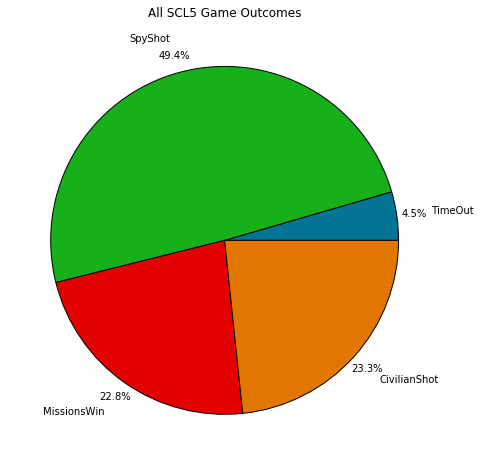

DataPlotProperties(frame=     WinType.TimeOut  WinType.SpyShot  WinType.MissionsWin  \
NaN              178             1951                  899   

     WinType.CivilianShot  
NaN                   922  , stacks_are_categories=True)

In [6]:
game_outcomes(
    scl5_replays,
    axis_properties=AxisProperties(title="All SCL5 Game Outcomes")
)

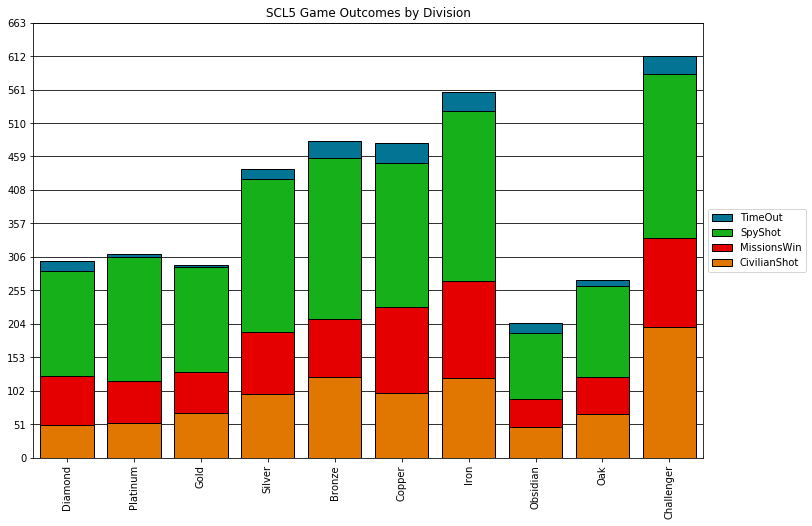

DataPlotProperties(frame=                      Diamond  Platinum  Gold  Silver  Bronze  Copper  Iron  \
WinType.TimeOut            16         5     3      16      26      30    30   
WinType.SpyShot           160       188   160     232     245     220   259   
WinType.MissionsWin        75        64    63      95      88     131   148   
WinType.CivilianShot       49        53    68      97     123      98   121   

                      Obsidian  Oak  Challenger  
WinType.TimeOut             15    9          28  
WinType.SpyShot            100  138         249  
WinType.MissionsWin         43   56         136  
WinType.CivilianShot        47   67         199  , stacks_are_categories=False)

In [7]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0])
    ),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

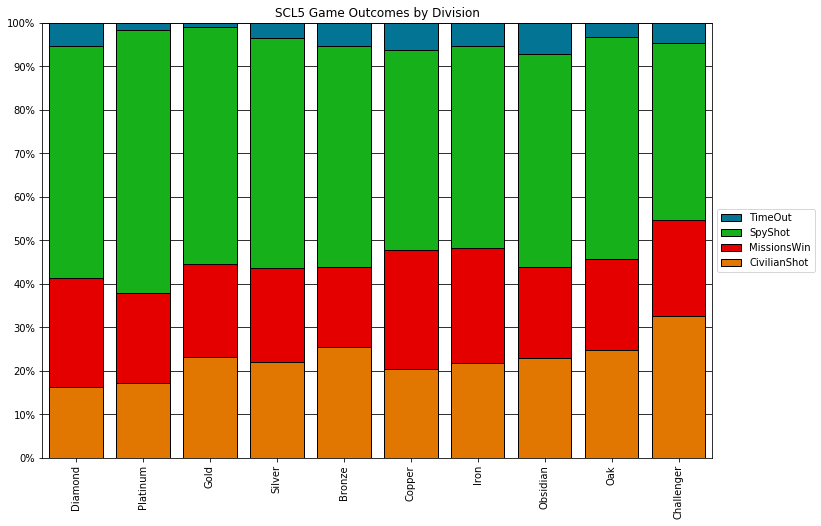

DataPlotProperties(frame=                       Diamond  Platinum      Gold    Silver    Bronze  \
WinType.TimeOut       0.053333  0.016129  0.010204  0.036364  0.053942   
WinType.SpyShot       0.533333  0.606452  0.544218  0.527273  0.508299   
WinType.MissionsWin   0.250000  0.206452  0.214286  0.215909  0.182573   
WinType.CivilianShot  0.163333  0.170968  0.231293  0.220455  0.255187   

                        Copper      Iron  Obsidian       Oak  Challenger  
WinType.TimeOut       0.062630  0.053763  0.073171  0.033333    0.045752  
WinType.SpyShot       0.459290  0.464158  0.487805  0.511111    0.406863  
WinType.MissionsWin   0.273486  0.265233  0.209756  0.207407    0.222222  
WinType.CivilianShot  0.204593  0.216846  0.229268  0.248148    0.325163  , stacks_are_categories=False)

In [8]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

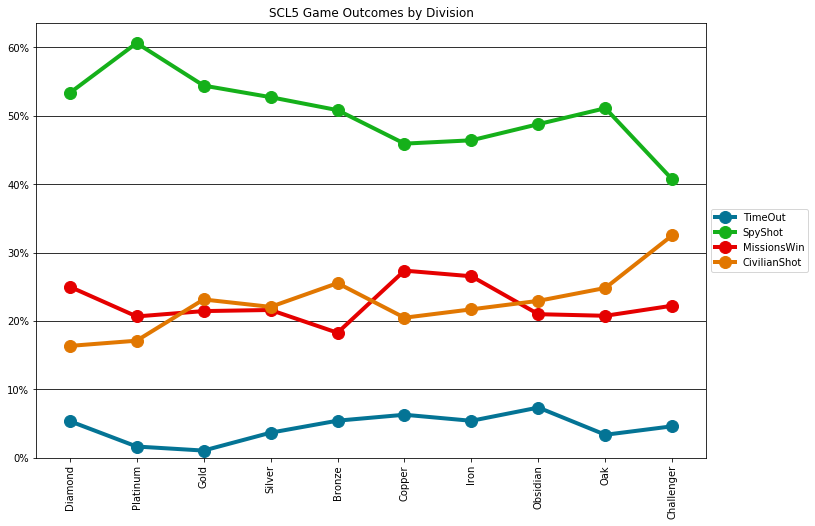

DataPlotProperties(frame=                       Diamond  Platinum      Gold    Silver    Bronze  \
WinType.TimeOut       0.053333  0.016129  0.010204  0.036364  0.053942   
WinType.SpyShot       0.533333  0.606452  0.544218  0.527273  0.508299   
WinType.MissionsWin   0.250000  0.206452  0.214286  0.215909  0.182573   
WinType.CivilianShot  0.163333  0.170968  0.231293  0.220455  0.255187   

                        Copper      Iron  Obsidian       Oak  Challenger  
WinType.TimeOut       0.062630  0.053763  0.073171  0.033333    0.045752  
WinType.SpyShot       0.459290  0.464158  0.487805  0.511111    0.406863  
WinType.MissionsWin   0.273486  0.265233  0.209756  0.207407    0.222222  
WinType.CivilianShot  0.204593  0.216846  0.229268  0.248148    0.325163  , stacks_are_categories=False)

In [9]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Division",
        force_line=True
    )
)

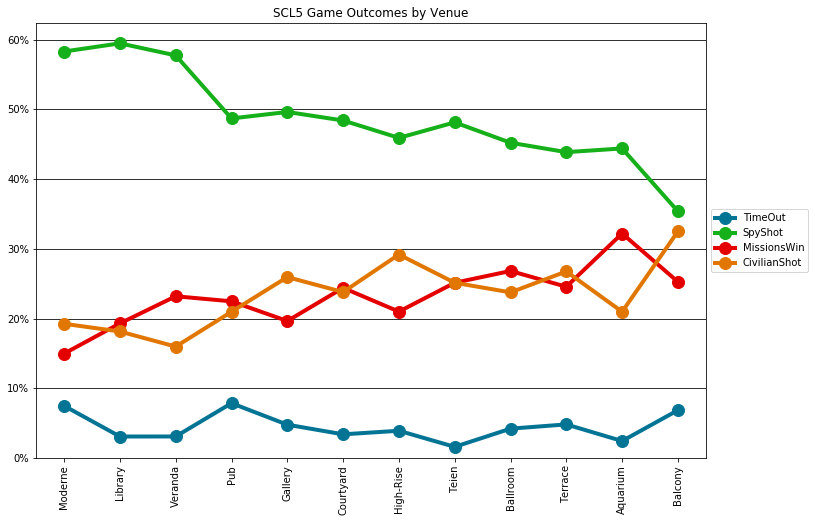

DataPlotProperties(frame=                       Moderne   Library   Veranda       Pub   Gallery  \
WinType.TimeOut       0.074866  0.030888  0.030928  0.078652  0.047859   
WinType.SpyShot       0.582888  0.594595  0.577320  0.486891  0.496222   
WinType.MissionsWin   0.149733  0.193050  0.231959  0.224719  0.196474   
WinType.CivilianShot  0.192513  0.181467  0.159794  0.209738  0.259446   

                      Courtyard  High-Rise     Teien  Ballroom   Terrace  \
WinType.TimeOut           0.034   0.039146  0.016043  0.042146  0.048246   
WinType.SpyShot           0.484   0.459075  0.481283  0.452107  0.438596   
WinType.MissionsWin       0.244   0.209964  0.251337  0.268199  0.245614   
WinType.CivilianShot      0.238   0.291815  0.251337  0.237548  0.267544   

                      Aquarium   Balcony  
WinType.TimeOut       0.024390  0.068592  
WinType.SpyShot       0.443902  0.353791  
WinType.MissionsWin   0.321951  0.252708  
WinType.CivilianShot  0.209756  0.324910  , stacks_

In [10]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Venue",
        savefig='example_pictures/scl5_venue_outcomes_line.png',
        force_line=True)
)

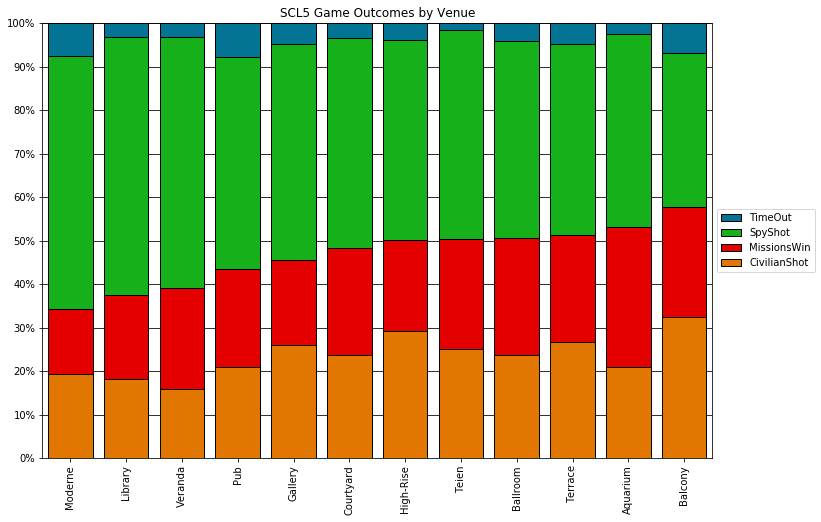

DataPlotProperties(frame=                       Moderne   Library   Veranda       Pub   Gallery  \
WinType.TimeOut       0.074866  0.030888  0.030928  0.078652  0.047859   
WinType.SpyShot       0.582888  0.594595  0.577320  0.486891  0.496222   
WinType.MissionsWin   0.149733  0.193050  0.231959  0.224719  0.196474   
WinType.CivilianShot  0.192513  0.181467  0.159794  0.209738  0.259446   

                      Courtyard  High-Rise     Teien  Ballroom   Terrace  \
WinType.TimeOut           0.034   0.039146  0.016043  0.042146  0.048246   
WinType.SpyShot           0.484   0.459075  0.481283  0.452107  0.438596   
WinType.MissionsWin       0.244   0.209964  0.251337  0.268199  0.245614   
WinType.CivilianShot      0.238   0.291815  0.251337  0.237548  0.267544   

                      Aquarium   Balcony  
WinType.TimeOut       0.024390  0.068592  
WinType.SpyShot       0.443902  0.353791  
WinType.MissionsWin   0.321951  0.252708  
WinType.CivilianShot  0.209756  0.324910  , stacks_

In [11]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Venue",
        savefig='example_pictures/scl5_venue_outcomes_stacked.png')
)

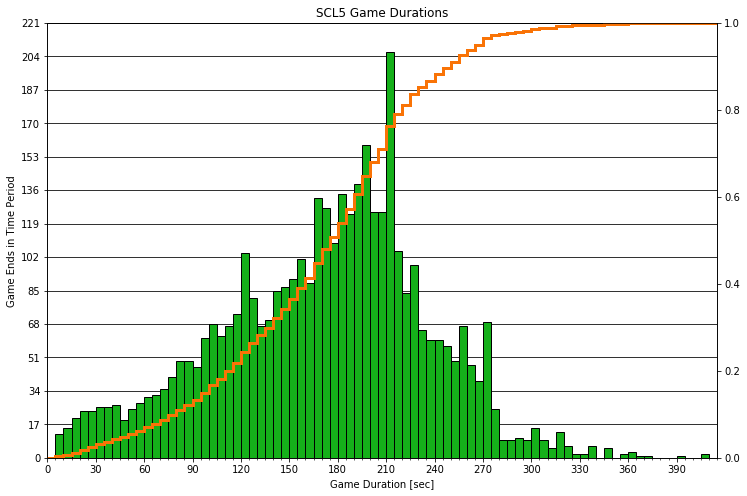

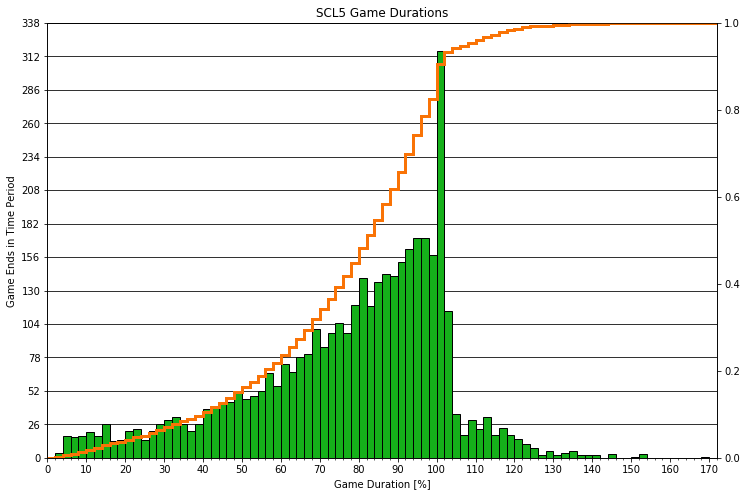

In [12]:
game_durations(scl5_replays, "SCL5 Game Durations")

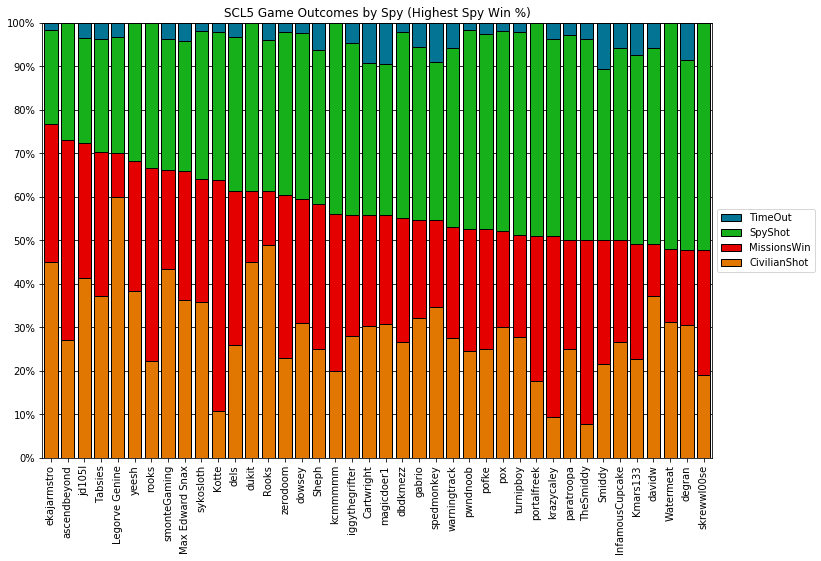

DataPlotProperties(frame=                      ekajarmstro  ascendbeyond    jd105l   Tabsies  \
WinType.TimeOut          0.016667      0.000000  0.034483  0.037037   
WinType.SpyShot          0.216667      0.269231  0.241379  0.259259   
WinType.MissionsWin      0.316667      0.461538  0.310345  0.333333   
WinType.CivilianShot     0.450000      0.269231  0.413793  0.370370   

                      Legorve Genine     yeesh     rooks  smonteGaming  \
WinType.TimeOut             0.033333  0.000000  0.000000      0.037736   
WinType.SpyShot             0.266667  0.319149  0.333333      0.301887   
WinType.MissionsWin         0.100000  0.297872  0.444444      0.226415   
WinType.CivilianShot        0.600000  0.382979  0.222222      0.433962   

                      Max Edward Snax  sykosloth  ...  krazycaley  paratroopa  \
WinType.TimeOut              0.042553   0.018868  ...    0.037736    0.027778   
WinType.SpyShot              0.297872   0.339623  ...    0.452830    0.472222   
WinTy

In [13]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Spy (Highest Spy Win %)")
)

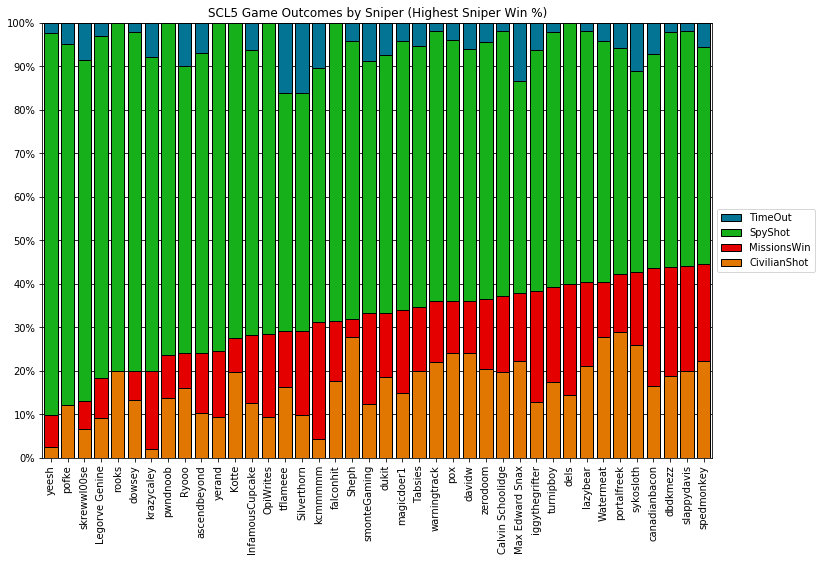

DataPlotProperties(frame=                         yeesh     pofke  skrewwl00se  Legorve Genine  rooks  \
WinType.TimeOut       0.024390  0.048780     0.086957        0.030303    0.0   
WinType.SpyShot       0.878049  0.829268     0.782609        0.787879    0.8   
WinType.MissionsWin   0.073171  0.000000     0.065217        0.090909    0.0   
WinType.CivilianShot  0.024390  0.121951     0.065217        0.090909    0.2   

                        dowsey  krazycaley  pwndnoob  Ryooo  ascendbeyond  \
WinType.TimeOut       0.022222        0.08  0.000000   0.10      0.068966   
WinType.SpyShot       0.777778        0.72  0.764706   0.66      0.689655   
WinType.MissionsWin   0.066667        0.18  0.098039   0.08      0.137931   
WinType.CivilianShot  0.133333        0.02  0.137255   0.16      0.103448   

                      ...  turnipboy      dels  lazybear  Watermeat  \
WinType.TimeOut       ...   0.021739  0.000000  0.019231   0.042553   
WinType.SpyShot       ...   0.586957  0.600000

In [14]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Sniper (Highest Sniper Win %)")
)